In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
#import seaborn as sns

# Collecting code LPP under the "100% Santé" plan

### Verification of L_SC1 titles who has been modified, erased or added between 2014 and 2024

In [37]:
diff = {}

for i in range(2024-2015):
    df1 = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{i+2014}.CSV", encoding='ISO-8859-1', sep=';')
    produits1 = df1["L_SC1"].unique().tolist()
    df2 = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{i+2014+1}.CSV", encoding='ISO-8859-1', sep=';')
    produits2 = df2["L_SC1"].unique().tolist()
    difference = list(set(produits1).difference(set(produits2)))
    key = f"{i+2014} - {i+2015}"
    diff[key] = difference

diff

{'2014 - 2015': [],
 '2015 - 2016': ['ACCESSOIRES DE PRODUITS INSCRITS AU TITRE III'],
 '2016 - 2017': [],
 '2017 - 2018': [],
 '2018 - 2019': [],
 '2019 - 2020': [],
 '2020 - 2021': ['DM DE MAINTIEN A DOMICILE ET D AIDE A LA VIE POUR MALADES ET HANDICAPE',
  'ACCESSOIRES DE PRODUITS INSCRITS AU TITRE III',
  'DISPOSITIFS MEDICAUX UTILISES DANS LE SYST CARDIO-VASCULAIRE',
  'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR',
  'IMPLANTS ISSUS DE DERIVES HUMAINS-GREFFONS',
  'PODO-ORTHESES'],
 '2021 - 2022': ['CODES ARRIVES A ECHEANCE'],
 '2022 - 2023': []}

The only thing that can interest us is "AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEUR", that we won't forget for the hearing field.

## Optical

### Getting the interesting L_SC1 titles

*avant tout il faut regarder si on prend bien tout les l_SC1 en compte parce qu'il y a eu des ajouts, suppressions et modif toutes ces années*

In [38]:
df2023cplt = pd.read_csv("../Open-LPP-data/base_complete/OPEN_LPP_2023.CSV", encoding='ISO-8859-1', sep=';')
produits = df2023cplt["L_SC1"].unique().tolist() #return a list of the L_SC1 title of all the product and prestation in the df
produits

['DM, MATERIELS ET PRODUITS POUR LE TRAITEMENT DE PATHOLOGIES SPECIFIQUES',
 'DM DE MAINTIEN A DOMICILE ET D AIDE A LA VIE POUR MALADES ET HANDICAPES',
 'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
 'CODES ARRIVES A ECHEANCE',
 'ORTHESES',
 'OPTIQUE MEDICALE',
 'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS',
 'PROTHESES EXTERNES NON ORTHOPEDIQUES',
 'PROTHESES OCULAIRES ET FACIALES',
 'PODO_ORTHESES',
 'DMI D ORIGINE SYNTHETIQUE',
 'DMI ISSUS DE DERIVES ORIGINE ANIMALE NON VIABLES OU EN COMPORTANT',
 'IMPLANTS ISSUS DE DERIVES HUMAINS_GREFFONS',
 'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS',
 'FAUTEUILS ROULANTS',
 'VEHICULES DIVERS',
 'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
 'DISPOSITIFS MEDICAUX UTILISES EN NEUROLOGIE',
 'DISPOISTIFS MEDICAUX UTILISES DANS LE SYSTEME CARDIO_VASCULAIRE',
 'DISPOSITIFS MEDICAUX UTILISES EN ONCOLOGIE',
 'DISPOSITIFS MEDICAUX UTILISES DANS LE SYSTEME GASTRO-INTESTINAL',
 'DISPOSITIFS MED

In [39]:
optical_100 = []
produits_index = [5, 8]

for i in range(len(produits_index)):
    optical_100.append(produits[produits_index[i]])

print(optical_100) #we got 2 interesting L_SC1 title which seem to be eligible to the 100% Santé plan for optical field, we will clean it more precisely.

['OPTIQUE MEDICALE', 'PROTHESES OCULAIRES ET FACIALES']


### Trying to clean the part "PROTHESES OCULAIRES ET FACIALES"

In [40]:
print(len(df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"]))
df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"].tail(3)
#we can notice that there are some shipping fees, we will look if we can disregard those.

943


,TITRE,L_TITRE,SC1,L_SC1,SC2,L_SC2,CODE_LPP,L_CODE_LPP,AGE,SEXE,BEN_REG,PSP_SPE,QTE,REM,BSE
729418,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_3,FRAIS D EXPEDITION ET FRAIS ACCESSOIRES,2593607,"PROTHESES OCULAIRES ET FACIALES, FRAIS D EXPED...",60,2,76,15,74,1710.00,1710.00
729419,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_3,FRAIS D EXPEDITION ET FRAIS ACCESSOIRES,2593607,"PROTHESES OCULAIRES ET FACIALES, FRAIS D EXPED...",60,2,76,90,22,718.00,718.00
729420,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_3,FRAIS D EXPEDITION ET FRAIS ACCESSOIRES,2593607,"PROTHESES OCULAIRES ET FACIALES, FRAIS D EXPED...",60,2,93,15,23,483.19,483.19


In [41]:
df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"]["L_SC2"].unique()

array(['PROTHESES OCULAIRES', 'PROTHESES FACIALES',
       'FRAIS D EXPEDITION ET FRAIS ACCESSOIRES'], dtype=object)

In [42]:
print(len(df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]))

916


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23748\235692083.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]))


In [43]:
df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]["L_CODE_LPP"].unique() 
#we figure out that this is not as precise as we would want, but we will keep all that points for the optical field (where L_SC1 = PROTHESES OCULAIRE ET FACIALES)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23748\202664890.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2023cplt[df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES"][df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS")]["L_CODE_LPP"].unique()


array(['PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT SUR MESURE',
       'PROTHESE OCULAIRE PROVISOIRE SUR GABARIT',
       "PROTHESE OCULAIRE DEFINITIVE DE RECOUVREMENT AVEC PRISE D'EMPREINTE",
       "PROTHESE OCULAIRE PROVISOIRE AVEC PRISE D'EMPREINTE",
       'PROTHESE OCULAIRE, RENOUVELLEMENT AVEC REPRISE DU CONTRE-TYPE INITIAL',
       'PROTHESE OCULAIRE ORGANIQUE, REPOLISSAGE',
       'PROTHESE OCULAIRE RECOUVRT, RENOUVT SANS PRISE EMPREINTE, +REPRISE MAITRE-MODELE',
       'PROTHESE OCULAIRE PROVISOIRE, TEST DE RECOUVREMENT, TEST DE TOLERANCE',
       "PROTHESE OCULAIRE, RENOUVELLEMENT AVEC PRISE D'EMPREINTE COMPLEMENTAIRE",
       'PROTHESE OCULAIRE PALPEBRO-ORBITAIRE, SUR DEVIS',
       "PROTHESE OCULAIRE DEFINITIVE AVEC PRISE D'EMPREINTE",
       'VERRE SCLERAL PERMEABLE OXYGENE, LAO, SPOT, RENOUVELLEMENT',
       "PROTHESE OCULAIRE, RENOUVELLEMENT AVEC PRISE D'EMPREINTE",
       'VERRE SCLERAL PERMEABLE OXYGENE, LAO, SPOT, PREMIERE MISE',
       "PROTHESE OCULAIRE DE RECOUV

In [44]:
final_mask = (df2023cplt["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES") & (df2023cplt["L_SC2"].str.contains("OCULAIRES|FRAIS"))
print(len(df2023cplt[final_mask])) #we get back with 742 lines as expected with the 2nd cell above.

916


In [45]:
df_optical_2023 = df2023cplt[final_mask]
df_optical_2023.head()

,TITRE,L_TITRE,SC1,L_SC1,SC2,L_SC2,CODE_LPP,L_CODE_LPP,AGE,SEXE,BEN_REG,PSP_SPE,QTE,REM,BSE
728478,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,11,90,17,7905.75,8959.85
728479,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,84,90,35,17919.70,18446.75
728480,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,99,15,24,12649.20,12649.20
728481,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,1,99,90,23,11700.51,12941.65
728482,2,TITRE 2 : ORTHESES ET PROTHESES EXTERNES,2_5,PROTHESES OCULAIRES ET FACIALES,2_5_1,PROTHESES OCULAIRES,2503780,PROTHESE OCULAIRE PROVISOIRE DE RECOUVREMENT S...,0,2,99,15,13,6851.65,6851.65


### Cleaning the dataframe of optical financement in 2014, to get the amounts of money

In [46]:
#we keep the column "REM" to calculate the financing because this is the money effectively gave by the "Sécurité Sociale"
df_optical_2023 = pd.DataFrame({
    "L_SC2" : df_optical_2023["L_SC2"],
    "CODE_LPP" : df_optical_2023["CODE_LPP"],
    "Quantity" : df_optical_2023["QTE"],
    "Financing" : df_optical_2023["REM"]
 })

In [47]:
df_optical_2023.reset_index(inplace=True)
df_optical_2023.drop(columns="index", inplace=True)
df_optical_2023.head()

,L_SC2,CODE_LPP,Quantity,Financing
0,PROTHESES OCULAIRES,2503780,17,7905.75
1,PROTHESES OCULAIRES,2503780,35,17919.70
2,PROTHESES OCULAIRES,2503780,24,12649.20
3,PROTHESES OCULAIRES,2503780,23,11700.51
4,PROTHESES OCULAIRES,2503780,13,6851.65


In [48]:
df_optical_2023["Total"] = df_optical_2023['Quantity']*df_optical_2023["Financing"]
df_optical_2023.head(5)

,L_SC2,CODE_LPP,Quantity,Financing,Total
0,PROTHESES OCULAIRES,2503780,17,7905.75,134397.75
1,PROTHESES OCULAIRES,2503780,35,17919.70,627189.50
2,PROTHESES OCULAIRES,2503780,24,12649.20,303580.80
3,PROTHESES OCULAIRES,2503780,23,11700.51,269111.73
4,PROTHESES OCULAIRES,2503780,13,6851.65,89071.45


In [49]:
sum = df_optical_2023["Total"].sum()
sum

927978230.53

### Ajusting the result to the inflation (September 2024)

In [50]:
optical_HICP = pd.read_csv("../data/HICP/HICP-Corrective-eye-glasses-and-contact-lenses-France-Annual-parts-per-1000.csv")
#optical_HICP = optical_HICP[optical_HICP["TIME PERIOD"]>=2014]
optical_HICP.head()

,DATE,TIME PERIOD,HICP - Corrective eye-glasses and contact lenses (ICP.A.FR.N.061310.4.INW)
0,1996-12-31,1996,0.0
1,1997-12-31,1997,0.0
2,1998-12-31,1998,0.0
3,1999-12-31,1999,0.0
4,2000-12-31,2000,0.0


In [51]:
def adjusted_price(df, initial_price, year_initial_price):
    df = df[df["TIME PERIOD"]>=year_initial_price]
    for i in range(len(df)):
        initial_price = initial_price*(1+(df.iloc[i, 2]/1000))
    return initial_price

In [52]:
adjusted = adjusted_price(optical_HICP, sum, 2023)

In [53]:
print(adjusted-sum)

11262493.632813692


### Automation of this processus for every year :

In [54]:
optical_expenditures = {} #{2014:300000, 2015:493000,...}

def adjusted_price(df, initial_price, year_initial_price):
    df = df[df["TIME PERIOD"]>=year_initial_price]
    for i in range(len(df)): #calculating the equivalent for the last year of the df (2024)
        initial_price = initial_price*(1+(df.iloc[i, 2]/1000))
    return initial_price

def gov_optical_exp(inflation_adjustment):
    elements = os.listdir("../Open-LPP-data/base_complete")
    for i in range(int(len(elements)/2)):
        df = pd.read_csv(f"../Open-LPP-data/base_complete/OPEN_LPP_{(i+2014)}.CSV", encoding='ISO-8859-1', sep=';')
        final_mask = (df["L_SC1"]=="PROTHESES OCULAIRES ET FACIALES") & (df["L_SC2"].str.contains("OCULAIRES|FRAIS"))
        #print(i+2014)
        df = df[final_mask]
        df = pd.DataFrame({
        "L_SC2" : df["L_SC2"],
        "CODE_LPP" : df["CODE_LPP"],
        "Quantity" : df["QTE"],
        "Financing" : df["REM"]
        })
        df.reset_index(inplace=True)
        df.drop(columns="index", inplace=True)
        df["Total"] = df['Quantity']*df["Financing"]
        sum = df["Total"].sum()
        key = str(i+2014)

        if inflation_adjustment==True:
            optical_expenditures[key]=adjusted_price(optical_HICP, sum, i+2014)
            #print("test")
        else:
            optical_expenditures[key]=sum
            
    return optical_expenditures


In [55]:
optical_expenditures_adjusted = gov_optical_exp(inflation_adjustment=True)
optical_expenditures_adjusted = copy.deepcopy(optical_expenditures_adjusted)
optical_expenditures_adjusted

In [22]:
optical_expenditures_non_adjusted = gov_optical_exp(inflation_adjustment=False)
optical_expenditures_non_adjusted

{'2014': 257674784.53000003,
 '2015': 332075200.08000004,
 '2016': 448333594.9,
 '2017': 493540776.92999995,
 '2018': 548612479.98,
 '2019': 624429990.09,
 '2020': 628600167.87,
 '2021': 782856285.6099999,
 '2022': 851585392.8199999,
 '2023': 927978230.53}

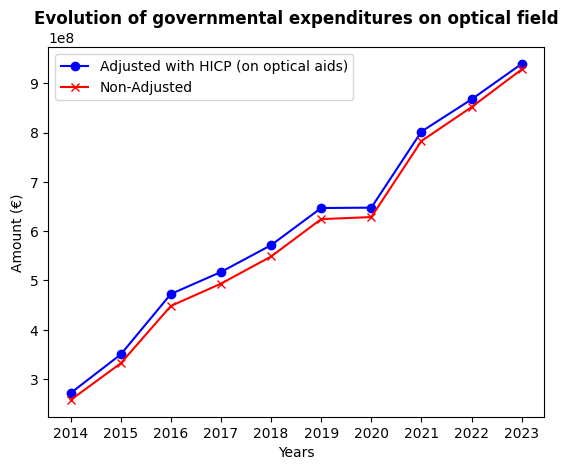

In [23]:
plt.plot(list(optical_expenditures_adjusted.keys()), list(optical_expenditures_adjusted.values()), marker="o", color="blue", label="Adjusted with HICP (on optical aids)")
plt.plot(list(optical_expenditures_non_adjusted.keys()), list(optical_expenditures_non_adjusted.values()), marker="x", color="red", label="Non-Adjusted")

plt.xlabel("Years")
plt.ylabel("Amount (€)")

plt.title("Evolution of governmental expenditures on optical field", fontweight="bold")
plt.legend()

We take aware of the fact that the trend is the same whether if we take in count the inflation rates or not.

We can deduce, in addition of the fact that the inflation don't touch a lot the health field, that the inflation is disregardable in general in the health field.

## Hearing

### Inflation adjustment

In [24]:
hearing_HICP = pd.read_csv("../data/HICP/HICP-Hearing-aids-France-Annual-parts-per-1000.csv")
hearing_HICP = hearing_HICP[hearing_HICP["TIME PERIOD"]>=2014]
hearing_HICP.head()
#clearly disregardable, because the HICP's unit is "parts per 1000", so for example, the inflation from 2015 to 2016 equals to 0,07%.
#moreover, as we can see just above this cell, the inflation rates don't have a lot of impact on health field prices

#we had foreseen that with optical field

,DATE,TIME PERIOD,HICP - Hearing aids (ICP.A.FR.N.061320.4.INW)
18,2014-12-31,2014,0.00
19,2015-12-31,2015,0.00
20,2016-12-31,2016,0.70
21,2017-12-31,2017,0.76
22,2018-12-31,2018,0.79


### Looking for the interesting fields

In [26]:
dfH2023 = pd.read_csv("../Open-LPP-data/base_complete/OPEN_LPP_2023.CSV", encoding='ISO-8859-1', sep=';')
produits = dfH2023["L_SC1"].unique().tolist() #return a list of the L_SC1 title of all the product and prestation in the df
produits

['DM, MATERIELS ET PRODUITS POUR LE TRAITEMENT DE PATHOLOGIES SPECIFIQUES',
 'DM DE MAINTIEN A DOMICILE ET D AIDE A LA VIE POUR MALADES ET HANDICAPES',
 'ARTICLES POUR PANSEMENTS, MATERIELS DE CONTENTION',
 'CODES ARRIVES A ECHEANCE',
 'ORTHESES',
 'OPTIQUE MEDICALE',
 'AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS',
 'PROTHESES EXTERNES NON ORTHOPEDIQUES',
 'PROTHESES OCULAIRES ET FACIALES',
 'PODO_ORTHESES',
 'DMI D ORIGINE SYNTHETIQUE',
 'DMI ISSUS DE DERIVES ORIGINE ANIMALE NON VIABLES OU EN COMPORTANT',
 'IMPLANTS ISSUS DE DERIVES HUMAINS_GREFFONS',
 'DISPOSITIFS MEDICAUX IMPLANTABLES ACTIFS',
 'FAUTEUILS ROULANTS',
 'VEHICULES DIVERS',
 'ADJONCTIONS, OPTIONS ET REPARATIONS APPLICABLES AUX FAUTEUILS ROULANTS',
 'DISPOSITIFS MEDICAUX UTILISES EN NEUROLOGIE',
 'DISPOISTIFS MEDICAUX UTILISES DANS LE SYSTEME CARDIO_VASCULAIRE',
 'DISPOSITIFS MEDICAUX UTILISES EN ONCOLOGIE',
 'DISPOSITIFS MEDICAUX UTILISES DANS LE SYSTEME GASTRO-INTESTINAL',
 'DISPOSITIFS MED

don't forget the labels that has been modified, added or erased between 2014 and 2024.

In [29]:
hearing_100 = []
produits_index = [6]

for i in range(len(produits_index)):
    hearing_100.append(produits[produits_index[i]])

print(hearing_100) #we got 2 interesting L_SC1 title which seem to be eligible to the 100% Santé plan for optical field, we will clean it more precisely.

['AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS']


In [ ]:
dfH2023[dfH2023["L_SC1"]=="AUDIOPROTHESES ET ENTRETIEN, REPARATIONS ET ACCESSOIRES POUR PROCESSEURS"]

In [30]:
#we keep the column "REM" to calculate the financing because this is the money effectively gave by the "Sécurité Sociale"
dfH2023 = pd.DataFrame({
    "L_SC2" : dfH2023["L_SC2"],
    "CODE_LPP" : dfH2023["CODE_LPP"],
    "Quantity" : dfH2023["QTE"],
    "Financing" : dfH2023["REM"]
 })

In [ ]:
dfH2023.reset_index(inplace=True)
dfH2023.drop(columns="index", inplace=True)
dfH2023.head()

,L_SC2,CODE_LPP,Quantity,Financing
0,PROTHESES OCULAIRES,2503780,17,7905.75
1,PROTHESES OCULAIRES,2503780,35,17919.70
2,PROTHESES OCULAIRES,2503780,24,12649.20
3,PROTHESES OCULAIRES,2503780,23,11700.51
4,PROTHESES OCULAIRES,2503780,13,6851.65


In [ ]:
df_optical_2023["Total"] = df_optical_2023['Quantity']*df_optical_2023["Financing"]
df_optical_2023.head(5)

,L_SC2,CODE_LPP,Quantity,Financing,Total
0,PROTHESES OCULAIRES,2503780,17,7905.75,134397.75
1,PROTHESES OCULAIRES,2503780,35,17919.70,627189.50
2,PROTHESES OCULAIRES,2503780,24,12649.20,303580.80
3,PROTHESES OCULAIRES,2503780,23,11700.51,269111.73
4,PROTHESES OCULAIRES,2503780,13,6851.65,89071.45


In [ ]:
sum = df_optical_2023["Total"].sum()
sum

927978230.53

## Dental

# Whole health field